# Sentimental Analysis of IMDB Movie Reviews

### Problem Statement:

   **To classify the number of positive and negative reviews(documents) based on sentiments, using different classification models in ML.**

**Importing neccesary packages**

In [ ]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer
import spacy
import re,string,unicodedata
import nltk
nltk.download('stopwords')
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import os
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Importing the data**

In [ ]:
imdb_data=pd.read_csv('/content/IMDB_dataset_320.000_reviews.csv')

In [ ]:
print(imdb_data.shape)

(320747, 16)


In [ ]:
imdb_data.head(3)

,ID_Number,Greek_Title,Original_Title,Category,Director/Creator,Movie_Lenght,Movie_Date,Author,Review_Date,Review_Title,Review,Label,Mean_of_Stars,Number_of_Reviews,Full_Reviews_Average_Stars,URL
0,0,Lethal Games,Lethal Games,Action,John T. Bone,1 hour 23 minutes,1991,Leofwine_draca,09-Aug-16,Worst of the worst,LETHAL GAMES is an absolutely awful attempt at...,1,1.00,1,4.3,https://www.imdb.com/title/tt00100009/?ref_=tt...
1,1,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,cseabhi,10-Jul-21,Lekin - Gulzar's haunting masterpiece,Gulzar is at his best when he is telling such ...,9,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...
2,2,Lekin...,Lekin...,Drama,Gulzar,2 hours 51 minutes,1990,abbott32,02-Jul-04,Haunting film but would love to have been abl...,I was completely mesmerized by Lekin and espec...,9,9.16,6,7.5,https://www.imdb.com/title/tt00100002/?ref_=tt...


In [ ]:
imdb_data = imdb_data.head(50000)

In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID_Number                   50000 non-null  int64  
 1   Greek_Title                 50000 non-null  object 
 2   Original_Title              50000 non-null  object 
 3   Category                    50000 non-null  object 
 4   Director/Creator            50000 non-null  object 
 5   Movie_Lenght                49709 non-null  object 
 6   Movie_Date                  50000 non-null  object 
 7   Author                      50000 non-null  object 
 8   Review_Date                 50000 non-null  object 
 9   Review_Title                50000 non-null  object 
 10  Review                      50000 non-null  object 
 11  Label                       50000 non-null  int64  
 12  Mean_of_Stars               50000 non-null  float64
 13  Number_of_Reviews           500

**Exploratory Data Analysis**

In [ ]:
#Summary of the dataset
imdb_data.describe()

,ID_Number,Label,Mean_of_Stars,Number_of_Reviews,Full_Reviews_Average_Stars
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,6.860560,6.860934,73.352260,6.421356
std,14433.901067,2.670202,1.214293,61.022399,1.125871
min,0.000000,1.000000,1.000000,1.000000,1.800000
25%,12499.750000,5.000000,6.150000,20.000000,5.800000
50%,24999.500000,7.000000,6.940000,57.000000,6.600000
75%,37499.250000,9.000000,7.680000,118.000000,7.200000
max,49999.000000,10.000000,10.000000,249.000000,9.100000


In [ ]:
#cleaning the data
print('Null Summary :')
print(imdb_data.isnull().sum())

Null Summary :
ID_Number                       0
Greek_Title                     0
Original_Title                  0
Category                        0
Director/Creator                0
Movie_Lenght                  291
Movie_Date                      0
Author                          0
Review_Date                     0
Review_Title                    0
Review                          0
Label                           0
Mean_of_Stars                   0
Number_of_Reviews               0
Full_Reviews_Average_Stars      0
URL                             0
dtype: int64


In [ ]:
print('Total Duplicated Rows : ', imdb_data.duplicated().sum())

Total Duplicated Rows :  0


In [ ]:
# Top 10 movies names.
import matplotlib.pyplot as plt

sorted_df = imdb_data.sort_values('Mean_of_Stars', ascending=False)
top_10_movies = sorted_df['Original_Title'].head(20)

# Remove duplicate movie titles
top_10_movies_unique = top_10_movies.drop_duplicates()
top_10_movies = top_10_movies_unique.head(10)

print(top_10_movies)

708          Madonna: Blond Ambition World Tour Live
25972                                      Solitaire
3565                             Polly: Comin' Home!
42682                        Our Hollywood Education
16059                               The First Circle
3554                                             PoV
42050                           L'ambassade en folie
26340                                Stop at Nothing
42600                                Off His Rockers
42216    The Nicholas Brothers: We Sing and We Dance
Name: Original_Title, dtype: object


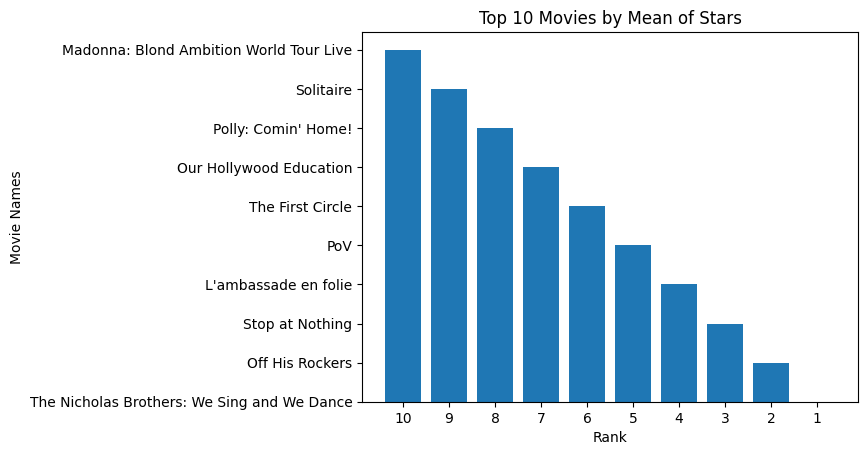

In [ ]:
# Reverse the order of the movie names
top_10_movies = top_10_movies[::-1]

# Create a bar plot
plt.bar(range(10, 0, -1), top_10_movies)
plt.ylabel('Movie Names')
plt.xlabel('Rank')
plt.title('Top 10 Movies by Mean of Stars')

# Customize the x-axis ticks and labels
plt.xticks(range(1, 11, 1), range(10, 0, -1))

# Show the plot
plt.show()

In [ ]:
# Perform sentiment analysis on each comment
imdb_data['Sentiment'] = imdb_data['Mean_of_Stars'].apply(lambda x: 'Positive' if x >= 6 else('Neutral' if x == 5  else 'Negative'))

In [ ]:
imdb_data = imdb_data[['Original_Title','Category','Director/Creator','Review','Sentiment']]

In [ ]:
imdb_data.head(3)

,Original_Title,Category,Director/Creator,Review,Sentiment
0,Lethal Games,Action,John T. Bone,LETHAL GAMES is an absolutely awful attempt at...,Negative
1,Lekin...,Drama,Gulzar,Gulzar is at his best when he is telling such ...,Positive
2,Lekin...,Drama,Gulzar,I was completely mesmerized by Lekin and espec...,Positive


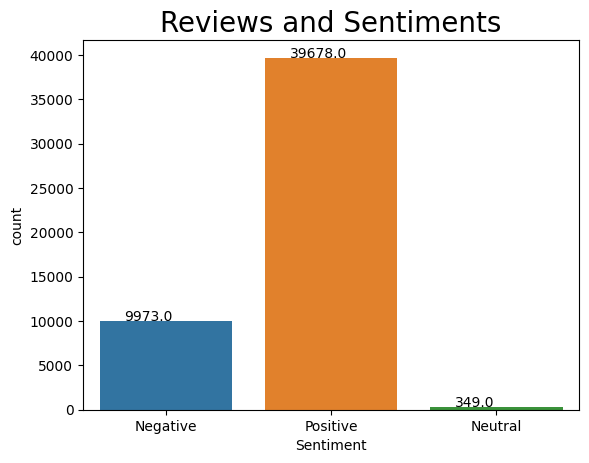

In [ ]:
#sentiment count
imdb_data['Sentiment'].value_counts()
ax = sns.countplot(data = imdb_data, x ='Sentiment')
ax.set_title('Reviews and Sentiments', fontsize=20)
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

**Splitting the dataset**

In [ ]:
#train dataset
train_reviews=imdb_data.Review[:40000]
train_sentiments=imdb_data.Sentiment[:40000]
#test dataset
test_reviews=imdb_data.Review[40001:50000]
test_sentiments=imdb_data.Sentiment[40001:50000]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(40000,) (40000,)
(9999,) (9999,)


### Data Mining Techniques

In [ ]:
# imdb_data = imdb_data.head(50000)

**1. Cleaning the text**

**Removing html strips and noise text**

In [ ]:
from bs4 import BeautifulSoup
import re,string,unicodedata

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub("'\[[^]]*\]'", '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
imdb_data['Review']=imdb_data['Review'].apply(denoise_text)

In [ ]:
selected_columns = imdb_data[['Review','Sentiment']]
selected_columns.head(3)

,Review,Sentiment
0,LETHAL GAMES is an absolutely awful attempt at...,Negative
1,Gulzar is at his best when he is telling such ...,Positive
2,I was completely mesmerized by Lekin and espec...,Positive


**Removing special characters**

In [ ]:
# Define function for removing special characters and converting to lowercase
def remove_special_characters(text):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    text = text.lower()
    return text

# Apply function on 'Review' column
imdb_data['Review'] = imdb_data['Review'].apply(remove_special_characters)

In [ ]:
selected_columns = imdb_data[['Review','Sentiment']]
selected_columns.head(3)

,Review,Sentiment
0,lethal games is an absolutely awful attempt at...,Negative
1,gulzar is at his best when he is telling such ...,Positive
2,i was completely mesmerized by lekin and espec...,Positive


**2. Tokenization**

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

imdb_data['Review_token'] = imdb_data['Review'].apply(regexp.tokenize)

In [ ]:
selected_columns = imdb_data[['Review','Review_token','Sentiment']]
selected_columns.head(3)

,Review,Review_token,Sentiment
0,lethal games is an absolutely awful attempt at...,"[lethal, games, is, an, absolutely, awful, att...",Negative
1,gulzar is at his best when he is telling such ...,"[gulzar, is, at, his, best, when, he, is, tell...",Positive
2,i was completely mesmerized by lekin and espec...,"[i, was, completely, mesmerized, by, lekin, an...",Positive


**3. Stop Word Filtering**

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [ ]:
# Remove stopwords for each row in the dataset
imdb_data['Review_token'] = imdb_data['Review'].apply(lambda x: [token for token in regexp.tokenize(x) if token.lower() not in stopwords])

In [ ]:
selected_columns = imdb_data[['Review','Review_token','Sentiment']]
selected_columns.head(3)

,Review,Review_token,Sentiment
0,lethal games is an absolutely awful attempt at...,"[lethal, games, absolutely, awful, attempt, ac...",Negative
1,gulzar is at his best when he is telling such ...,"[gulzar, best, telling, intriiguing, story, ea...",Positive
2,i was completely mesmerized by lekin and espec...,"[completely, mesmerized, lekin, especially, ca...",Positive


**4.Negation Handling**

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to handle negation
def handle_negation(tokens):
    negation_words = ['not', 'no', 'never','neither','nor','nobody','none','nothing','nowhere','hardly','barely','scarely',
                      'rarely','seldom','without']
    negation_present = False
    negated_tokens = []
    for token in tokens:
        if token in negation_words:
            negation_present = True
        elif negation_present and any(p in token for p in ['.', '!', '?']):
            negation_present = False
        if negation_present:
            negated_tokens.append('not_' + token)
        else:
            negated_tokens.append(token)
    return negated_tokens

# Apply negation handling to the tokenized reviews
imdb_data['Review_token'] = imdb_data['Review_token'].apply(handle_negation)


In [ ]:
selected_columns = imdb_data[['Review','Review_token','Sentiment']]
selected_columns.head(3)

,Review,Review_token,Sentiment
0,lethal games is an absolutely awful attempt at...,"[lethal, games, absolutely, awful, attempt, ac...",Negative
1,gulzar is at his best when he is telling such ...,"[gulzar, best, telling, intriiguing, story, ea...",Positive
2,i was completely mesmerized by lekin and espec...,"[completely, mesmerized, lekin, especially, ca...",Positive


**Text stemming**

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def stem_tokens(tokens):
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return stemmed_tokens

imdb_data['Review_token'] = imdb_data['Review_token'].apply(stem_tokens)

In [ ]:
selected_columns = imdb_data[['Review','Review_token','Sentiment']]
selected_columns.head(3)

,Review,Review_token,Sentiment
0,lethal games is an absolutely awful attempt at...,"[lethal, game, absolut, aw, attempt, action, t...",Negative
1,gulzar is at his best when he is telling such ...,"[gulzar, best, tell, intriigu, stori, eas, per...",Positive
2,i was completely mesmerized by lekin and espec...,"[complet, mesmer, lekin, especi, castl, dimpl,...",Positive


**Normalized train reviews**

In [ ]:
norm_train_reviews=imdb_data.Review_token[:40000]
norm_train_reviews[0]

['lethal',
 'game',
 'absolut',
 'aw',
 'attempt',
 'action',
 'thriller',
 'one',
 'worst',
 'ive',
 'seen',
 'direct',
 'porn',
 'director',
 'john',
 'bone',
 'pseudonym',
 'john',
 'bowen',
 'idea',
 'qualiti',
 'direct',
 'alreadi',
 'even',
 'scriptwrit',
 'daniel',
 'benton',
 'use',
 'pseudonym',
 'film',
 'must',
 'realli',
 'proud',
 'achievementsth',
 'film',
 'shot',
 'sunni',
 'california',
 'look',
 'like',
 'home',
 'camera',
 'main',
 'charact',
 'play',
 'frank',
 'stallon',
 'featur',
 'promin',
 'film',
 'poster',
 'not_bar',
 'not_get',
 'not_littl',
 'not_screen',
 'not_tim',
 'not_main',
 'not_charact',
 'not_annoy',
 'not_coupl',
 'not_young',
 'not_women',
 'not_overact',
 'not_lat',
 'not_middleag',
 'not_woman',
 'not_discern',
 'not_act',
 'not_abilityth',
 'not_bad',
 'not_guy',
 'not_group',
 'not_psychopath',
 'not_rapist',
 'not_viol',
 'not_misfit',
 'not_seem',
 'not_bas',
 'not_on',
 'not_motorbik',
 'not_gang',
 'not_mad',
 'not_max',
 'not_ther',
 'n

**Normalized test reviews**

In [ ]:
norm_test_reviews=imdb_data.Review_token[40000:]
norm_test_reviews[45005]

['one',
 'worst',
 'movi',
 'ive',
 'ever',
 'seen',
 'kind',
 'charact',
 'pacino',
 'portray',
 'come',
 'kind',
 'dialogu',
 'suggest',
 'pacino',
 'portray',
 'charact',
 'ridicul',
 'manner',
 'expect',
 'kid',
 'interrupt',
 'pacino',
 'blurt',
 'talk',
 'like',
 'rememb',
 'seinfeld',
 'episod',
 'mr',
 'bookman',
 'librari',
 'cop',
 'hilari',
 'straightfac',
 'parodi',
 'seriou',
 'jack',
 'webb',
 'dragnet',
 'pacino',
 'charact',
 'act',
 'like',
 'smartass',
 'lt',
 'kojak',
 'seriou',
 'imperson',
 'mr',
 'bookman',
 'ten',
 'time',
 'hoohaw',
 'belch',
 'pacino',
 'averag',
 'viewer',
 'endur',
 'point',
 'movi',
 'real',
 'stori',
 'pacino',
 'serious',
 'overr',
 'movi',
 'terribl']

**Bags of words model: Converts  text documents to numerical vectors or bag of words**

In [ ]:
# Convert elements to strings
norm_train_reviews = [str(review) for review in norm_train_reviews]
norm_test_reviews = [str(review) for review in norm_test_reviews]

In [ ]:
# Count vectorizer for bag of words
cv = CountVectorizer(min_df=0, max_df=1, binary=False, ngram_range=(1,3))

# Transformed train reviews
cv_train_reviews = cv.fit_transform(norm_train_reviews)

# Transformed test reviews
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:', cv_train_reviews.shape)
print('BOW_cv_test:', cv_test_reviews.shape)

BOW_cv_train: (40000, 6325538)
BOW_cv_test: (10000, 6325538)


In [ ]:
print(cv_train_reviews)

  (1, 1898631)	1
  (1, 2363346)	1
  (1, 5271086)	4
  (1, 6307042)	1
  (1, 1680493)	1
  (1, 5181426)	1
  (1, 2488805)	1
  (1, 941748)	1
  (1, 1974358)	1
  (1, 5181461)	1
  (1, 1634402)	2
  (1, 5777227)	1
  (1, 1898632)	1
  (1, 1047465)	1
  (1, 4843558)	1
  (1, 1975779)	1
  (1, 579317)	1
  (1, 1989612)	1
  (1, 1986312)	1
  (1, 2363347)	1
  (1, 5646650)	1
  (1, 5271093)	1
  (1, 6307043)	1
  (1, 1989604)	1
  (1, 1948170)	1
  :	:
  (39999, 1009473)	1
  (39999, 2405648)	1
  (39999, 6171977)	1
  (39999, 4702131)	1
  (39999, 6142000)	1
  (39999, 1261955)	1
  (39999, 2183999)	1
  (39999, 5158986)	1
  (39999, 2038437)	1
  (39999, 945851)	1
  (39999, 2308452)	1
  (39999, 1076707)	1
  (39999, 1487399)	1
  (39999, 5598045)	1
  (39999, 5038573)	1
  (39999, 1427623)	1
  (39999, 6047541)	1
  (39999, 2124495)	1
  (39999, 1064449)	1
  (39999, 1152850)	1
  (39999, 723623)	1
  (39999, 5753511)	1
  (39999, 505954)	1
  (39999, 2121502)	1
  (39999, 4724133)	1


**Term Frequency-Inverse Document Frequency model (TFIDF): Converts text documents to matrix of tfidf features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (40000, 6325538)
Tfidf_test: (10000, 6325538)


**Labeling and splitting the sentiment data**

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

lb = LabelBinarizer()
label_encoder = LabelEncoder()

# Encode string labels into numeric values
encoded_sentiment = label_encoder.fit_transform(imdb_data['Sentiment'])
sentiment_data = lb.fit_transform(np.where(encoded_sentiment > 0, 1, 0))
print(sentiment_data.shape)

(50000, 1)


In [ ]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:40000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[0]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


# **Fitting the Machine Learning Models**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a logistic regression model with L2 regularization (ridge)
alpha = 0.1  # Regularization strength (smaller values mean stronger regularization)
logreg_model = LogisticRegression(penalty='l2', C=1/alpha)

# Train the model
logreg_model.fit(cv_train_reviews, train_sentiments)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(cv_test_reviews)

# Calculate accuracy on the test set
accuracy_logreg = accuracy_score(test_sentiments, y_pred_logreg)
print(f"Accuracy on Test Set (Logistic Regression): {accuracy_logreg:.2f}")

# Check the accuracy on the training set (this can be an indicator of overfitting)
y_pred_train = logreg_model.predict(cv_train_reviews)
accuracy_train = accuracy_score(train_sentiments, y_pred_train)
print(f"Accuracy on Training Set (Logistic Regression): {accuracy_train:.2f}")

# Implement early stopping to reduce overfitting
best_accuracy = 0.0
best_model = None
for epoch in range(100):
    logreg_model.fit(cv_train_reviews, train_sentiments)
    y_pred_val = logreg_model.predict(cv_test_reviews)
    accuracy_val = accuracy_score(test_sentiments, y_pred_val)

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_model = logreg_model
    else:
        # If accuracy doesn't improve for a certain number of epochs, stop training
        print(f"Stopping training after epoch {epoch}")
        break

# Make predictions using the best model found during early stopping
y_pred_final = best_model.predict(cv_test_reviews)
accuracy_final = accuracy_score(test_sentiments, y_pred_final)
print(f"Accuracy on Test Set (Logistic Regression with Early Stopping): {accuracy_final:.2f}")


Accuracy on Test Set (Logistic Regression): 0.79
Accuracy on Training Set (Logistic Regression): 1.00
Stopping training after epoch 1
Accuracy on Test Set (Logistic Regression with Early Stopping): 0.79


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Accuracy score for bag of words - training data
lr_bow_train_score = accuracy_score(train_sentiments, lr_bow.predict(cv_train_reviews))
print("lr_bow_train_score:", lr_bow_train_score)

# Accuracy score for tfidf features - training data
lr_tfidf_train_score = accuracy_score(train_sentiments, lr_tfidf.predict(tv_train_reviews))
print("lr_tfidf_train_score:", lr_tfidf_train_score)

# Accuracy score for bag of words - testing data
lr_bow_test_score = accuracy_score(test_sentiments, lr_bow_predict)
print("lr_bow_test_score:", lr_bow_test_score)

# Accuracy score for tfidf features - testing data
lr_tfidf_test_score = accuracy_score(test_sentiments, lr_tfidf_predict)
print("lr_tfidf_test_score:", lr_tfidf_test_score)

lr_bow_train_score: 0.997775
lr_tfidf_train_score: 0.804675
lr_bow_test_score: 0.7898
lr_tfidf_test_score: 0.784


In [ ]:
#Classification report for bag of words
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.03      0.05      2160
    Negative       0.79      1.00      0.88      7840

    accuracy                           0.79     10000
   macro avg       0.89      0.51      0.47     10000
weighted avg       0.83      0.79      0.70     10000

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      2160
    Negative       0.78      1.00      0.88      7840

    accuracy                           0.78     10000
   macro avg       0.39      0.50      0.44     10000
weighted avg       0.61      0.78      0.69     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[7840    0]
 [2102   58]]
[[7840    0]
 [2160    0]]


**Linear support vector machines**

In [ ]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


In [ ]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
# Accuracy score for bag of words - training data
svm_bow_train_score = accuracy_score(train_sentiments, svm_bow.predict(cv_train_reviews))
print("svm_bow_train_score:", svm_bow_train_score)

# Accuracy score for tfidf features - training data
svm_tfidf_train_score = accuracy_score(train_sentiments, svm_tfidf.predict(tv_train_reviews))
print("svm_tfidf_train_score:", svm_tfidf_train_score)

# Accuracy score for bag of words - testing data
svm_bow_test_score = accuracy_score(test_sentiments, svm_bow_predict)
print("svm_bow_test_score:", svm_bow_test_score)

# Accuracy score for tfidf features - testing data
svm_tfidf_test_score = accuracy_score(test_sentiments, svm_tfidf_predict)
print("svm_tfidf_test_score:", svm_tfidf_test_score)

svm_bow_train_score: 0.9932
svm_tfidf_train_score: 0.804675
svm_bow_test_score: 0.7897
svm_tfidf_test_score: 0.784


In [ ]:
#Classification report for bag of words
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.03      0.05      2160
    Negative       0.79      1.00      0.88      7840

    accuracy                           0.79     10000
   macro avg       0.89      0.51      0.47     10000
weighted avg       0.83      0.79      0.70     10000

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00      2160
    Negative       0.78      1.00      0.88      7840

    accuracy                           0.78     10000
   macro avg       0.39      0.50      0.44     10000
weighted avg       0.61      0.78      0.69     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[7840    0]
 [2103   57]]
[[7840    0]
 [2160    0]]


**Multinomial Naive Bayes Classifier**

In [ ]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [ ]:
# Accuracy score for bag of words - training data
mnb_bow_train_score = accuracy_score(train_sentiments, mnb_bow.predict(cv_train_reviews))
print("mnb_bow_train_score:", mnb_bow_train_score)

# Accuracy score for tfidf features - training data
mnb_tfidf_train_score = accuracy_score(train_sentiments, mnb_tfidf.predict(tv_train_reviews))
print("mnb_tfidf_train_score:", mnb_tfidf_train_score)

# Accuracy score for bag of words - testing data
mnb_bow_test_score = accuracy_score(test_sentiments, mnb_bow_predict)
print("mnb_bow_test_score:", mnb_bow_test_score)

# Accuracy score for tfidf features - testing data
mnb_tfidf_test_score = accuracy_score(test_sentiments, mnb_tfidf_predict)
print("mnb_tfidf_test_score:", mnb_tfidf_test_score)

mnb_bow_train_score: 0.98135
mnb_tfidf_train_score: 0.899725
mnb_bow_test_score: 0.7896
mnb_tfidf_test_score: 0.7861


In [ ]:
#Classification report for bag of words
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.84      0.03      0.06      2160
    Negative       0.79      1.00      0.88      7840

    accuracy                           0.79     10000
   macro avg       0.82      0.52      0.47     10000
weighted avg       0.80      0.79      0.70     10000

              precision    recall  f1-score   support

    Positive       1.00      0.01      0.02      2160
    Negative       0.79      1.00      0.88      7840

    accuracy                           0.79     10000
   macro avg       0.89      0.50      0.45     10000
weighted avg       0.83      0.79      0.69     10000



In [ ]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[7827   13]
 [2091   69]]
[[7840    0]
 [2139   21]]


**Model Comparison**

The accuracy score achieved using Logistic Regression on training data is: 0.997775 %
The accuracy score achieved using Logistic Regression on testing data is: 0.7898 %

The accuracy score achieved using Support Vector Machine on training data is: 0.9932 %
The accuracy score achieved using Support Vector Machine on testing data is: 0.7897 %

The accuracy score achieved using Naive Bayes on training data is: 0.98135 %
The accuracy score achieved using Naive Bayes on testing data is: 0.7896 %



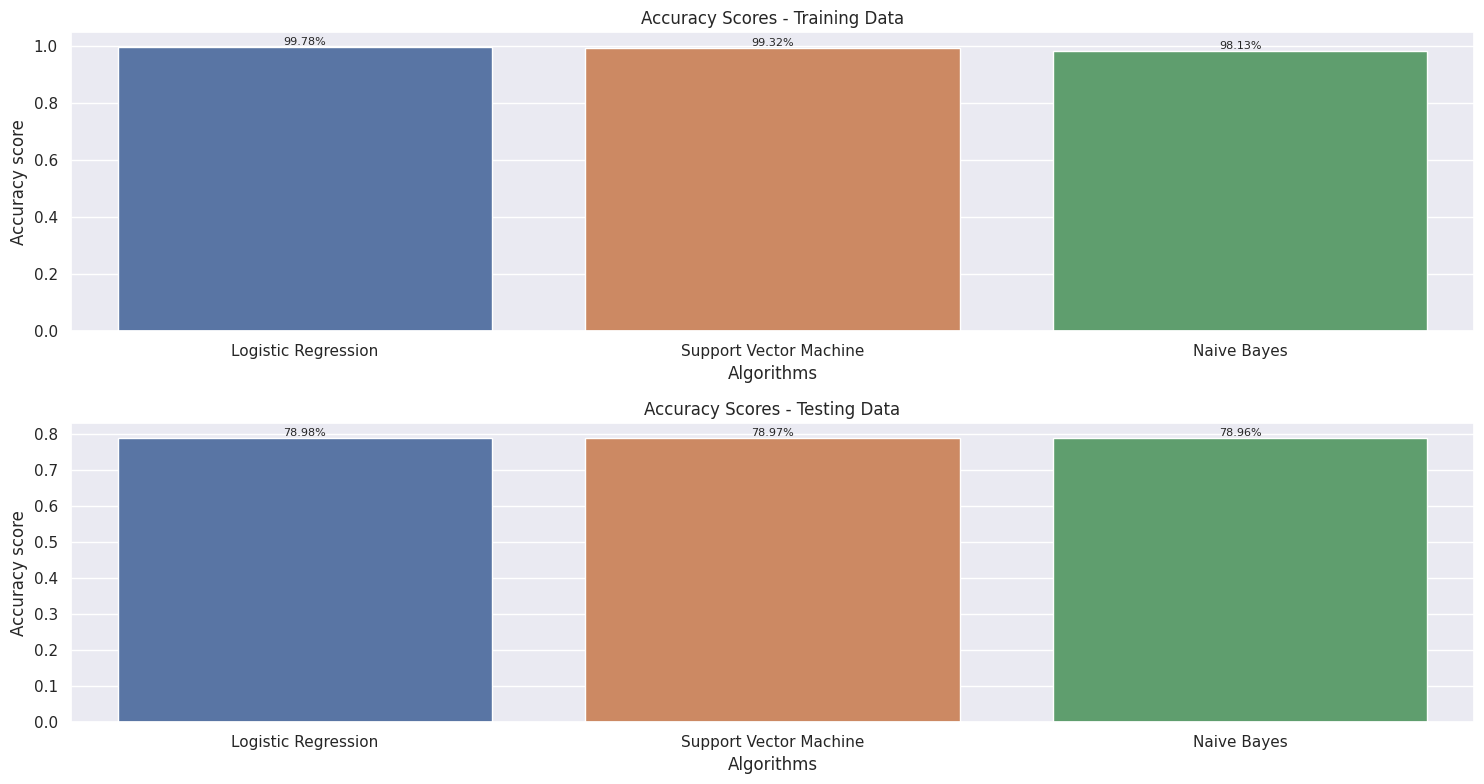

In [ ]:
# Accuracy scores for training data
train_scores = [lr_bow_train_score, svm_bow_train_score, mnb_bow_train_score]
# Accuracy scores for testing data
test_scores = [lr_bow_test_score, svm_bow_test_score, mnb_bow_test_score]
algorithms = ["Logistic Regression", "Support Vector Machine", "Naive Bayes"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " on training data is: " + str(train_scores[i]) + " %")
    print("The accuracy score achieved using " + algorithms[i] + " on testing data is: " + str(test_scores[i]) + " %")
    print()

sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Plotting separate bar plots for training and testing scores
plt.subplot(2, 1, 1)
ax1 = sns.barplot(x=algorithms, y=train_scores)
plt.title("Accuracy Scores - Training Data")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Adding percentage labels to the training bar plot
for i, v in enumerate(train_scores):
    ax1.text(i, v, f"{v:.2%}", ha='center', va='bottom', fontsize=8)

plt.subplot(2, 1, 2)
ax2 = sns.barplot(x=algorithms, y=test_scores)
plt.title("Accuracy Scores - Testing Data")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Adding percentage labels to the testing bar plot
for i, v in enumerate(test_scores):
    ax2.text(i, v, f"{v:.2%}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

The accuracy score achieved using Logistic Regression on training data is: 0.804675 %
The accuracy score achieved using Logistic Regression on testing data is: 0.784 %

The accuracy score achieved using Support Vector Machine on training data is: 0.804675 %
The accuracy score achieved using Support Vector Machine on testing data is: 0.784 %

The accuracy score achieved using Naive Bayes on training data is: 0.899725 %
The accuracy score achieved using Naive Bayes on testing data is: 0.7861 %



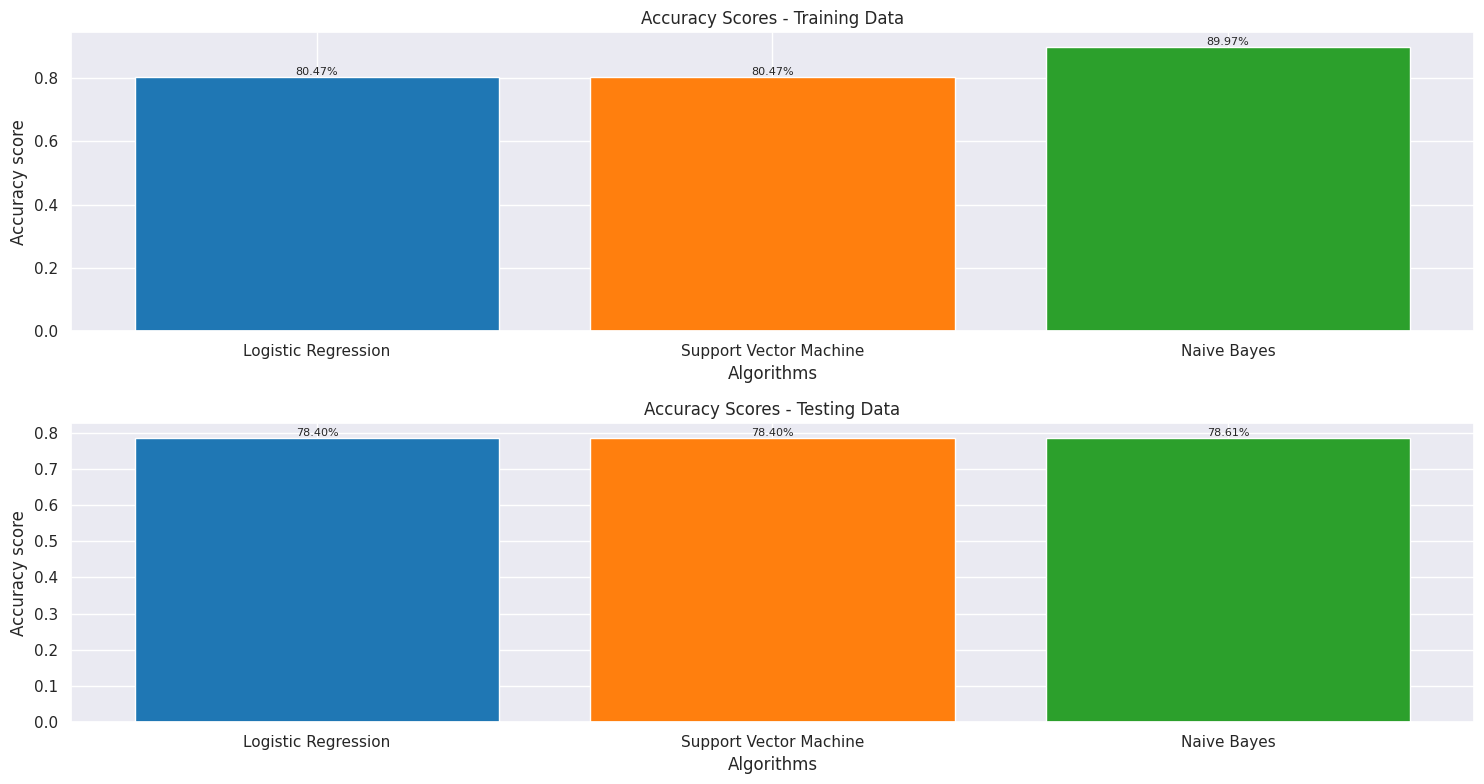

In [ ]:
# Accuracy scores for training data
train_scores1 = [lr_tfidf_train_score, svm_tfidf_train_score, mnb_tfidf_train_score]
# Accuracy scores for testing data
test_scores1 = [lr_tfidf_test_score, svm_tfidf_test_score, mnb_tfidf_test_score]
algorithms1 = ["Logistic Regression", "Support Vector Machine", "Naive Bayes"]

for i in range(len(algorithms1)):
    print("The accuracy score achieved using " + algorithms1[i] + " on training data is: " + str(train_scores1[i]) + " %")
    print("The accuracy score achieved using " + algorithms1[i] + " on testing data is: " + str(test_scores1[i]) + " %")
    print()

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Specify colors for each algorithm

plt.figure(figsize=(15, 8))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Plotting separate bar plots for training and testing scores
plt.subplot(2, 1, 1)
plt.bar(algorithms1, train_scores1, color=colors)
plt.title("Accuracy Scores - Training Data")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Adding percentage labels to the training bar plot
for i, v in enumerate(train_scores1):
    plt.text(i, v, f"{v:.2%}", ha='center', va='bottom', fontsize=8)

plt.subplot(2, 1, 2)
plt.bar(algorithms1, test_scores1, color=colors)
plt.title("Accuracy Scores - Testing Data")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

# Adding percentage labels to the testing bar plot
for i, v in enumerate(test_scores1):
    plt.text(i, v, f"{v:.2%}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


**Conclusion:
        We can observe that both Logistic Regression and Multinomial Naive Bayes model are performing well when compared to Linear Support Vector Machines.**